In [1]:
import	numpy  as  np
import	cv2
from matplotlib  import pyplot  as	plt
import os
import  sys
import platform
import threading

In [2]:
# img_grey = cv2.imread(path, cv2.IMREAD_COLOR)
# print(img_grey.shape)
# i_r = img_grey[:,:,0]
# i_g = img_grey[:,:,1]
# i_b = img_grey[:,:,2]
# x = 0
# i_channel = img_grey[:,:,x]
# print(i_channel)


In [2]:
def check_flower(img, thresh, height, width):
    
    visted = set()
    area = set()
    for y, row in enumerate(img):
        for x, val in enumerate(row):
            if (x,y) in visted:
                continue
            if val >= thresh:
                points = set()
                bounds = [width,height,0,0]
                image_bfs(img,thresh,x,y,height, width, points, bounds)
                visted |= points
                if (bounds[2]-bounds[0])*(bounds[3]-bounds[1]) > height*width*0.15:
                    area.add((*bounds, len(points),len(points)*1./((bounds[2]-bounds[0])*(bounds[3]-bounds[1]))))
    return area

def image_bfs(img, thresh, x, y, height, width, points, bound):
    if (x,y) in points or img[y][x] < thresh:
        # print('visted')
        return
    # print(len(points))
    points.add((x,y))
    bound[0] = min(x,bound[0])
    bound[1] = min(y,bound[1])
    bound[2] = max(x,bound[2])
    bound[3] = max(y,bound[3])
    if x > 0 and (x-1, y) not in points:
        image_bfs(img, thresh, x-1, y, height, width, points, bound)
    if y > 0 and (x, y-1) not in points:
        image_bfs(img, thresh, x, y-1, height, width, points, bound)
    if x < width-1 and (x+1, y) not in points:
        image_bfs(img, thresh, x+1, y, height, width, points, bound)
    if y < height-1 and (x, y+1) not in points:
        image_bfs(img, thresh, x, y+1, height, width, points, bound)


In [3]:
def image_segment(path = 'E:/CMPE_master_project/photo/photo/barbeton_daisy/image_02189.jpg',thresh = 128):
    img = cv2.imread(path, cv2.IMREAD_COLOR)
    height, width,_ = img.shape
    i_channel = []
    for i in range(3):
        i_channel.append(img[:,:,i].tolist())
    res = check_flower(i_channel[2],thresh,height, width)
    print(res)



In [4]:
import	numpy  as  np
import	cv2
from	matplotlib  import pyplot  as	plt
import os
import sys

sys.setrecursionlimit(10000)

image_segment()

AttributeError: 'NoneType' object has no attribute 'shape'

In [2]:
def convert_image(path = 'E:/CMPE_master_project/photo/photo/barbeton_daisy/image_02189.jpg',thresh = 128):
    img_grey = cv2.imread(path, cv2.IMREAD_COLOR)
    thresh = 125
    x = 2
    i_channel = []
    for i in range(3):
        i_channel.append(img_grey[:,:,i])
    red_img = np.zeros(img_grey.shape)
    green_img = np.zeros(img_grey.shape)
    blue_img = np.zeros(img_grey.shape)
    # red_img[:,:,x] = i_channel
    # red_img = red_img.astype('int8')
    # print(red_img)
    # threshold the image
    img_binary = []
    for i in i_channel:
        img_binary.append(cv2.threshold(i, thresh, 255, cv2.THRESH_BINARY)[1])

    red_img[:,:,x] = img_binary[2]
    red_img = red_img.astype('int8')
    green_img[:,:,x] = img_binary[1]
    green_img = green_img.astype('int8')
    blue_img[:,:,x] = img_binary[0]
    blue_img = blue_img.astype('int8')
    # for i in img_binary:
    #     print(i)
    
    plt.subplot(221),
    plt.imshow(cv2.cvtColor(cv2.imread(path),cv2.COLOR_BGR2RGB))
    plt.title("original"),	plt.xticks([]),	plt.yticks([])

    plt.subplot(222),  plt.imshow(red_img)
    plt.title("red_channel"),	plt.xticks([]),	plt.yticks([])

    plt.subplot(223),  plt.imshow(green_img)
    plt.title("green_channel"),	plt.xticks([]),	plt.yticks([])

    plt.subplot(224),  plt.imshow(blue_img)
    plt.title("blue_channel"),	plt.xticks([]),	plt.yticks([])
    
    plt.show()

In [1]:
path = 'E:/CMPE_master_project/photo/photo/'

type_names = os.listdir('E:/CMPE_master_project/photo/photo/')
target = 'E:/CMPE_master_project/photo/photo/{}/'.format(type_names[3])
for name in os.listdir(target) :
    try:
        convert_image(target + name)
    except Exception as e:
        print(e)
        print(name)

NameError: name 'os' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


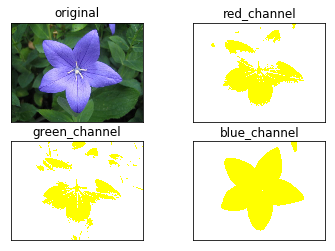

In [8]:
convert_image('E:/CMPE_master_project/photo/photo/19_49/image_06177.jpg')